# Exploratory Data Analysis (EDA) of Hotel Bookings

The analyzed dataset is available in .csv format on Kaggle: https://www.kaggle.com/datasets/mojtaba142/hotel-booking

## 0) General Data Structure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
hotels = pd.read_parquet("hotels.parquet")
hotels.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,0,0,0,C,C
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,0,0,0,C,C
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,0,0,0,A,C
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,0,0,0,A,A
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,0,0,0,A,A
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,0,0,0,A,A
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,0,0,0,C,C
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,0,0,0,C,C
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,0,0,0,A,A
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,0,0,0,D,D


In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  is_repeated_gues

## 1) Signs of Seasonality in the Dataset

In [4]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

hotels['arrival_date_month_number'] = hotels['arrival_date_month'].map(month_map)

season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

season_colors = {'Winter': '#bebada', 'Spring': '#8dd3c7', 'Summer': '#ffffb3', 'Autumn': '#fb8072'}

hotels['season'] = hotels['arrival_date_month_number'].map(season_map)

hotels['arrival_date_month_number'] = pd.to_numeric(hotels['arrival_date_month_number'])
bookings = hotels.groupby(['hotel', 'arrival_date_month_number', 'season', 'arrival_date_year']).size().reset_index(name='bookings')
bookings = bookings.sort_values(['hotel', 'arrival_date_month_number'], ascending=[True, True])

city_hotel = bookings[bookings['hotel'] == 'City Hotel']
resort_hotel = bookings[bookings['hotel'] == 'Resort Hotel']

bookings.head()


,hotel,arrival_date_month_number,season,arrival_date_year,bookings
0,City Hotel,1,Winter,2016,1364
1,City Hotel,1,Winter,2017,2372
2,City Hotel,2,Winter,2016,2371
3,City Hotel,2,Winter,2017,2594
4,City Hotel,3,Spring,2016,3046


### Mean Booking Number

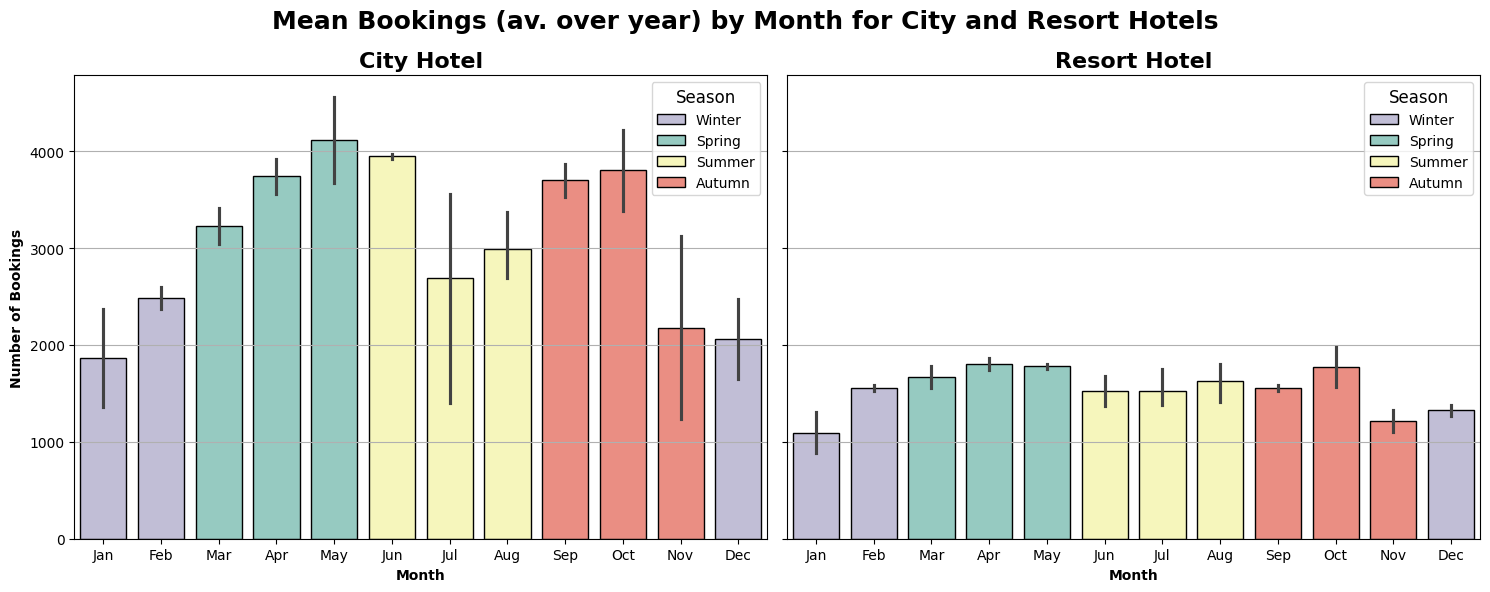

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.barplot(x='arrival_date_month_number', y='bookings', data=city_hotel, hue='season', palette=season_colors, ax=axes[0], edgecolor='black')
axes[0].set_title("City Hotel", fontweight='bold', fontsize=16)
axes[0].set_xlabel('Month', fontweight='bold')
axes[0].set_ylabel('Number of Bookings', fontweight='bold')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, axis='y')
axes[0].legend(title='Season', title_fontsize=12)

sns.barplot(x='arrival_date_month_number', y='bookings', data=resort_hotel, hue='season', palette=season_colors, ax=axes[1], edgecolor='black')
axes[1].set_title("Resort Hotel", fontweight='bold', fontsize=16)
axes[1].set_xlabel('Month', fontweight='bold')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, axis='y')
axes[1].legend(title='Season', title_fontsize=12)

plt.xlabel('Month')
plt.ylabel('Number of Bookings', fontweight='bold')
plt.suptitle('Mean Bookings (av. over year) by Month for City and Resort Hotels', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


### Total Booking Number

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\77967304.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arrival_date_month_number', y='bookings', data=city_hotel, hue='season',
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\77967304.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arrival_date_month_number', y='bookings', data=resort_hotel, hue='season',


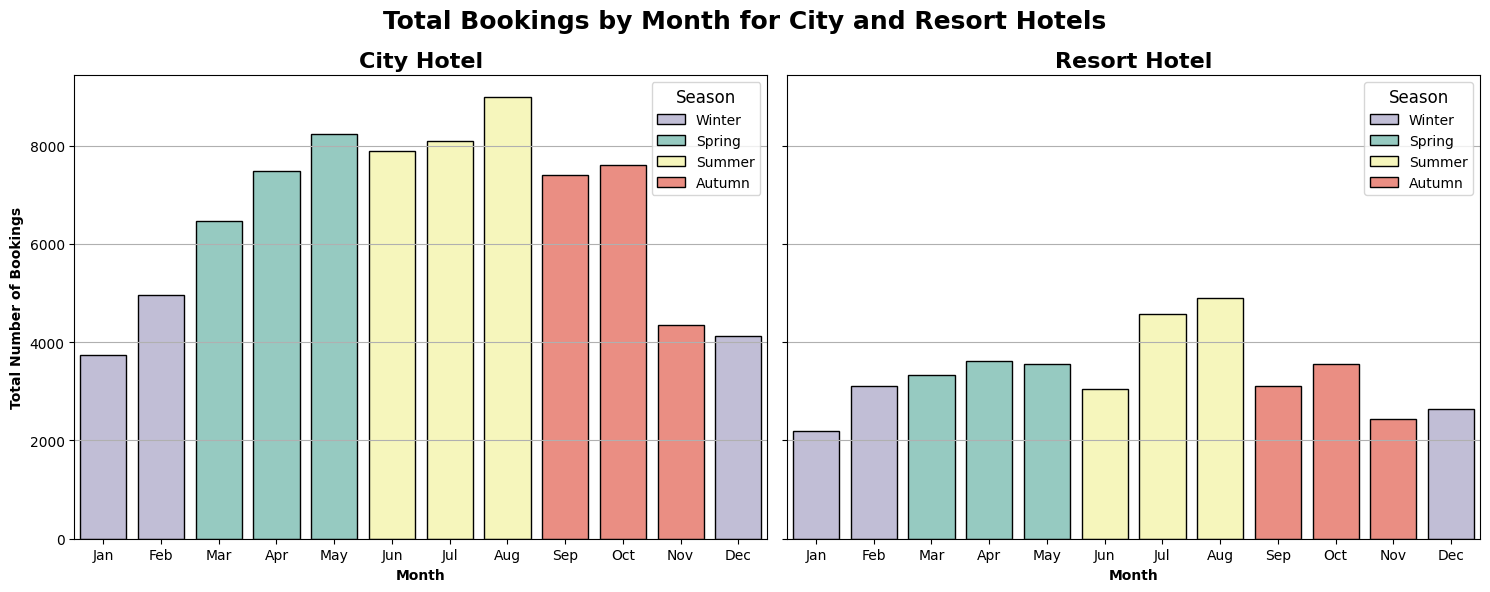

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.barplot(x='arrival_date_month_number', y='bookings', data=city_hotel, hue='season',
            palette=season_colors, ax=axes[0], edgecolor='black', estimator=np.sum, ci=None)
axes[0].set_title("City Hotel", fontweight='bold', fontsize=16)
axes[0].set_xlabel('Month', fontweight='bold')
axes[0].set_ylabel('Total Number of Bookings', fontweight='bold')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(True, axis='y')
axes[0].legend(title='Season', title_fontsize=12)

sns.barplot(x='arrival_date_month_number', y='bookings', data=resort_hotel, hue='season',
            palette=season_colors, ax=axes[1], edgecolor='black', estimator=np.sum, ci=None)
axes[1].set_title("Resort Hotel", fontweight='bold', fontsize=16)
axes[1].set_xlabel('Month', fontweight='bold')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, axis='y')
axes[1].legend(title='Season', title_fontsize=12)

plt.suptitle("Total Bookings by Month for City and Resort Hotels", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()


### Total Booking Number for the whole Reservation Period

#### City Hotel

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\891864542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel['season'] = city_hotel['arrival_date_month_number'].map(season_map)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\891864542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel['month_year'] = city_hotel['arrival_date_year'].astype(str) + '-' + city_hotel['arrival_date_month_number'].astype(str)


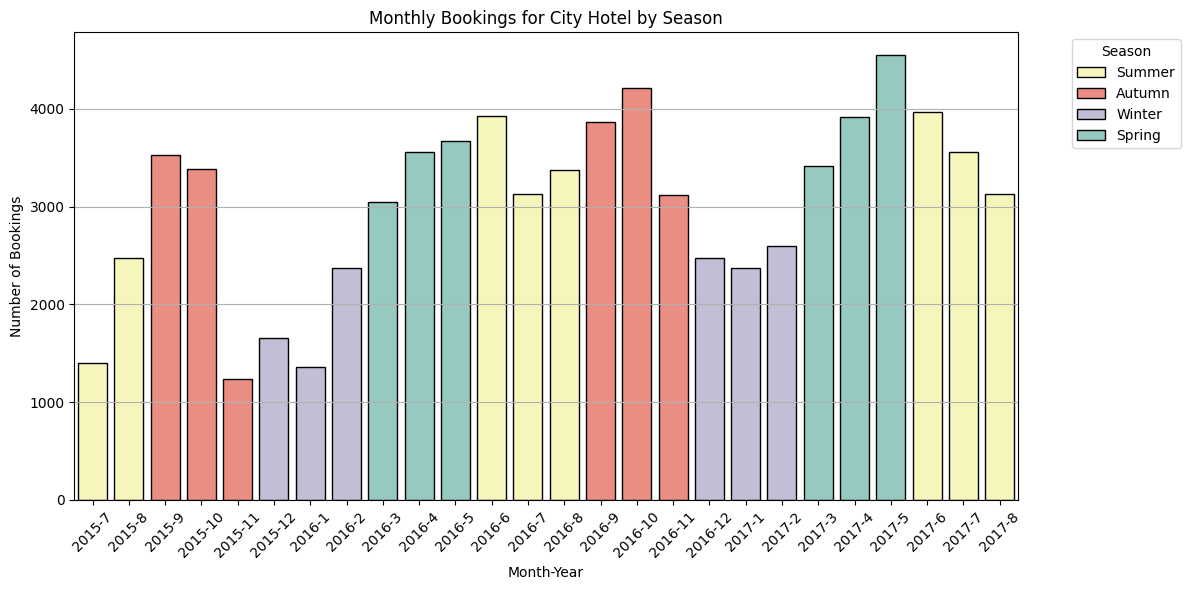

In [7]:
city_hotel['season'] = city_hotel['arrival_date_month_number'].map(season_map)

city_hotel['month_year'] = city_hotel['arrival_date_year'].astype(str) + '-' + city_hotel['arrival_date_month_number'].astype(str)

city_hotel_sorted = city_hotel.sort_values(by=['arrival_date_year', 'arrival_date_month_number'], ascending=[True, True])

plt.figure(figsize=(12, 6))

sns.barplot(x='month_year', y='bookings', data=city_hotel_sorted, hue='season', 
            palette=season_colors, dodge=False, edgecolor='black')

plt.title("Monthly Bookings for City Hotel by Season")
plt.xlabel("Month-Year")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#### Resort Hotel

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\4019545069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel['season'] = resort_hotel['arrival_date_month_number'].map(season_map)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\4019545069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel['month_year'] = resort_hotel['arrival_date_year'].astype(str) + '-' + resort_hotel['arrival_date_month_number'].astype(str)


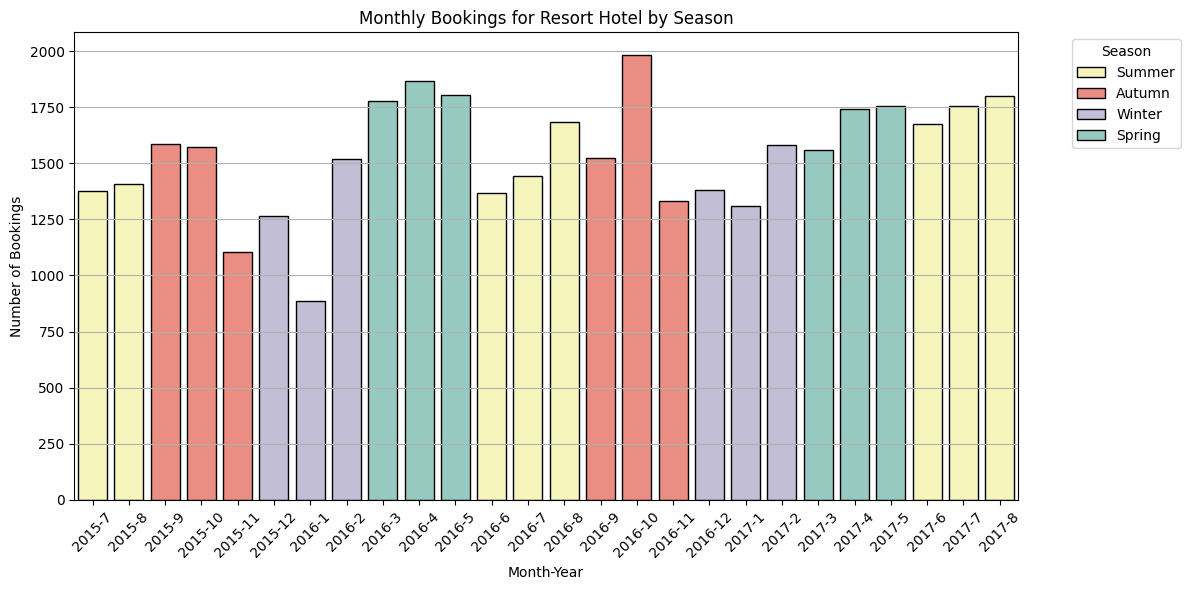

In [8]:
resort_hotel['season'] = resort_hotel['arrival_date_month_number'].map(season_map)

resort_hotel['month_year'] = resort_hotel['arrival_date_year'].astype(str) + '-' + resort_hotel['arrival_date_month_number'].astype(str)

resort_hotel_sorted = resort_hotel.sort_values(by=['arrival_date_year', 'arrival_date_month_number'], ascending=[True, True])

plt.figure(figsize=(12, 6))

sns.barplot(x='month_year', y='bookings', data=resort_hotel_sorted, hue='season', 
            palette=season_colors, dodge=False, edgecolor='black')

plt.title("Monthly Bookings for Resort Hotel by Season")
plt.xlabel("Month-Year")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Heatmaps

#### City Hotel

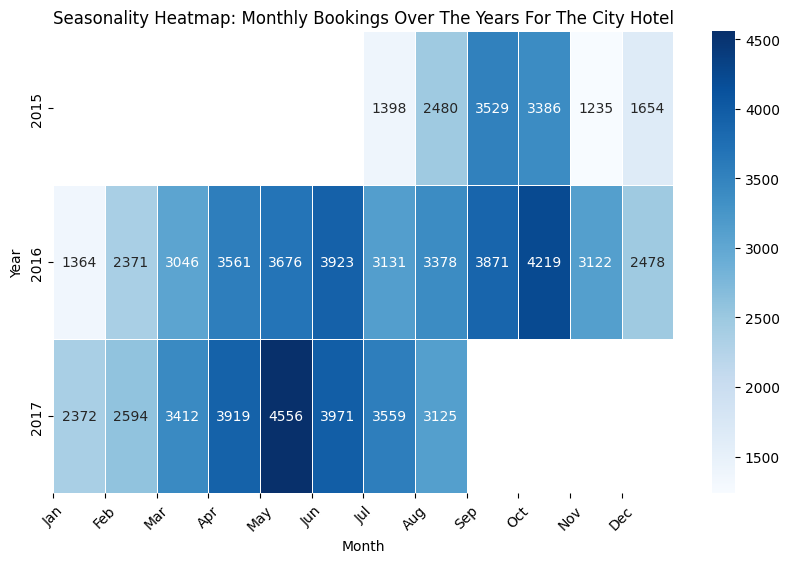

In [9]:
pivot = city_hotel.pivot_table(values='bookings', index='arrival_date_year', columns='arrival_date_month_number', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Seasonality Heatmap: Monthly Bookings Over The Years For The City Hotel")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

#### Resort Hotel

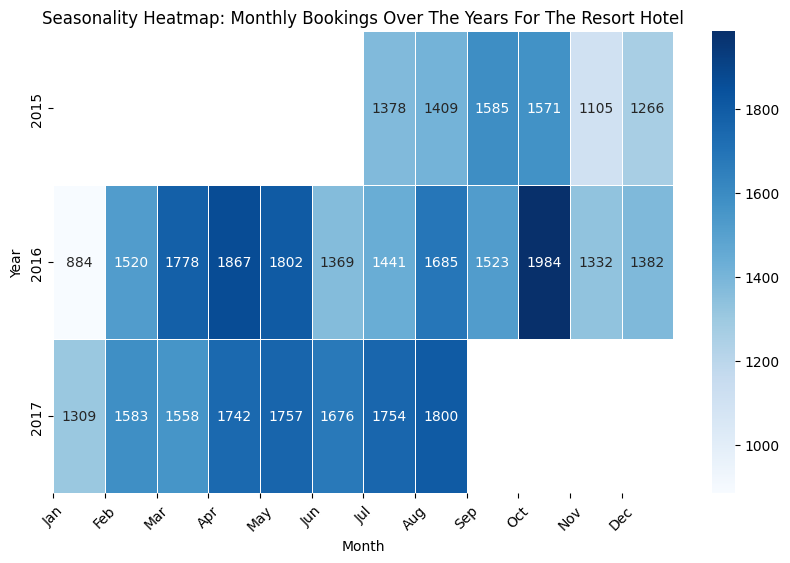

In [10]:
pivot = resort_hotel.pivot_table(values='bookings', index='arrival_date_year', columns='arrival_date_month_number', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Seasonality Heatmap: Monthly Bookings Over The Years For The Resort Hotel")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### Boxplots

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\1647097473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='bookings', data=city_hotel, palette=season_colors)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\1647097473.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='bookings', data=resort_hotel, palette=season_colors)


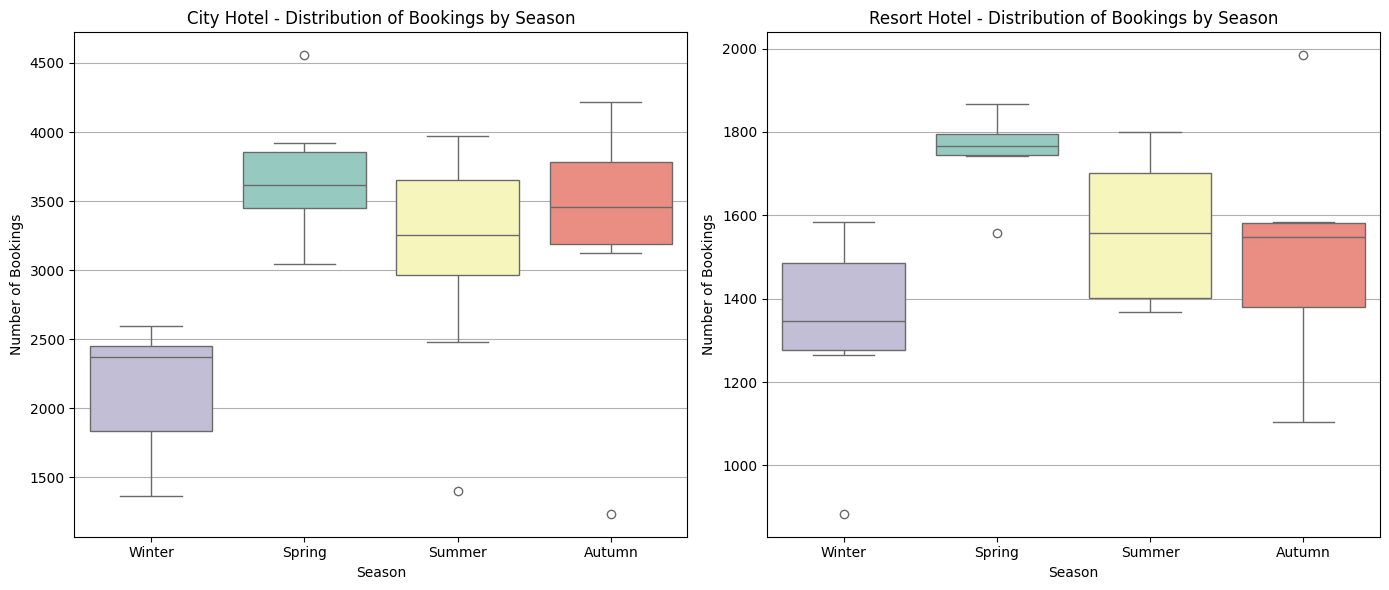

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='bookings', data=city_hotel, palette=season_colors)
plt.xlabel("Season")
plt.ylabel("Number of Bookings")
plt.title("City Hotel - Distribution of Bookings by Season")
plt.grid(True, axis='y')

plt.subplot(1, 2, 2)
sns.boxplot(x='season', y='bookings', data=resort_hotel, palette=season_colors)
plt.xlabel("Season")
plt.ylabel("Number of Bookings")
plt.title("Resort Hotel - Distribution of Bookings by Season")
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


### Full Correlation Heatmap

#### City Hotel

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\1531698081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel['season_number']=city_hotel['season'].map(season_number)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\1531698081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel['total_stay'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']


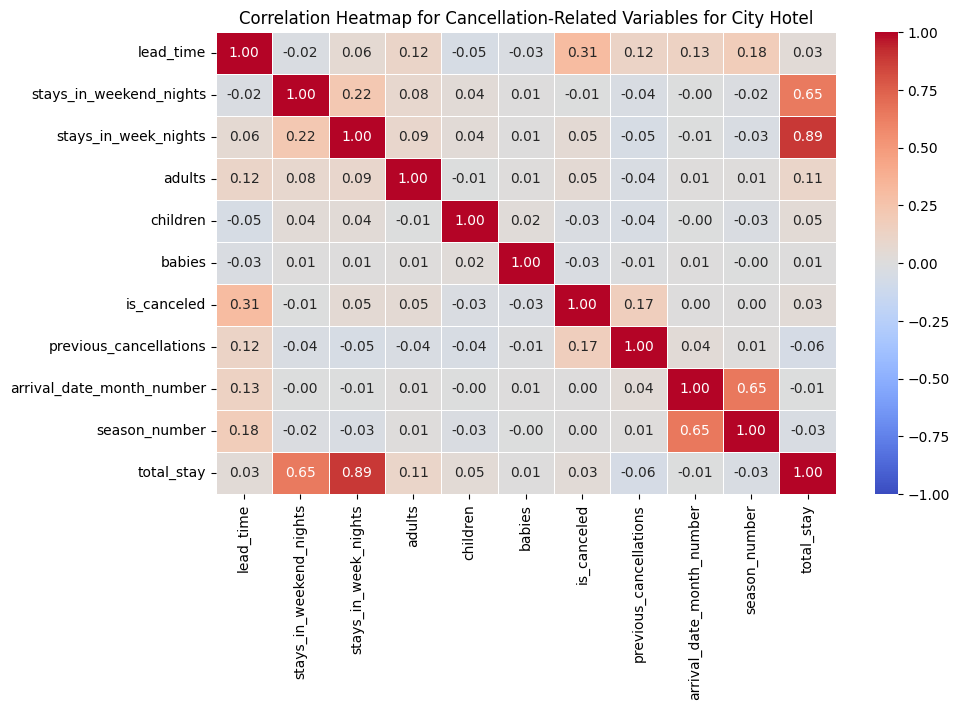

In [12]:
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
                     'children', 'babies', 'is_canceled', 'previous_cancellations', 'arrival_date_month_number', 'season_number', 'total_stay']

city_hotel = hotels[hotels['hotel'] == 'City Hotel']
season_number={'Winter': 1, 'Spring': 2, 'Summer':3, 'Autumn':4}
city_hotel['season_number']=city_hotel['season'].map(season_number)
city_hotel['total_stay'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']
corr_matrix = city_hotel[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Cancellation-Related Variables for City Hotel")
plt.show()


#### Resort Hotel

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\2195944639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel['season_number']=resort_hotel['season'].map(season_number)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\2195944639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel['total_stay'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']


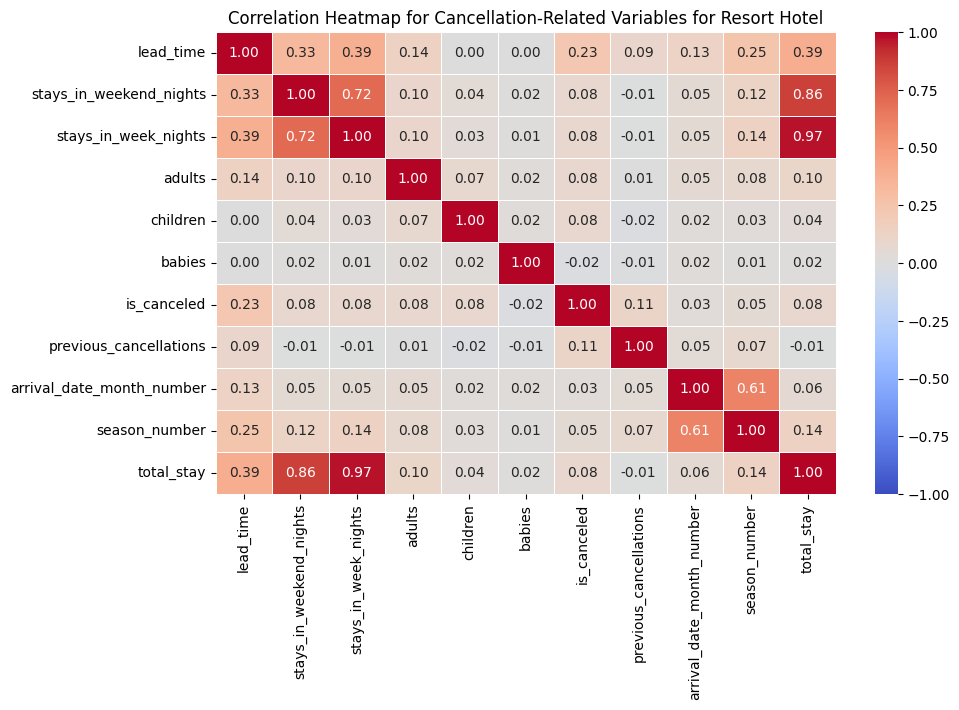

In [13]:
numerical_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
                     'children', 'babies', 'is_canceled', 'previous_cancellations', 'arrival_date_month_number', 'season_number', 'total_stay']

resort_hotel = hotels[hotels['hotel'] == 'Resort Hotel']
season_number={'Winter': 1, 'Spring': 2, 'Summer':3, 'Autumn':4}
resort_hotel['season_number']=resort_hotel['season'].map(season_number)
resort_hotel['total_stay'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']
corr_matrix = resort_hotel[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Cancellation-Related Variables for Resort Hotel")
plt.show()


## 2) Visualization of the Total Length of Stay Distribution

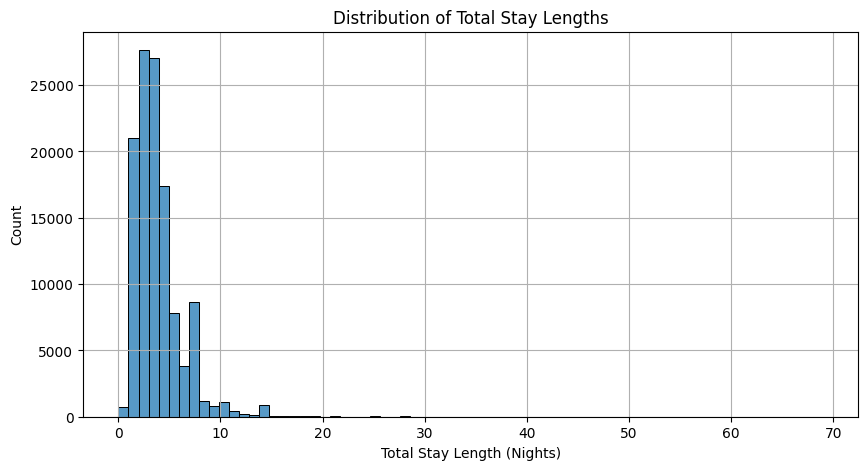

In [14]:
hotels['total_stay'] = hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights']
plt.figure(figsize=(10,5))
sns.histplot(hotels['total_stay'], bins=70, kde=False)
plt.title("Distribution of Total Stay Lengths")
plt.xlabel("Total Stay Length (Nights)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Boxplot: Total Stay Length by Season

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\1197731055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='total_stay', data=hotels, palette=season_colors, order=season_order)


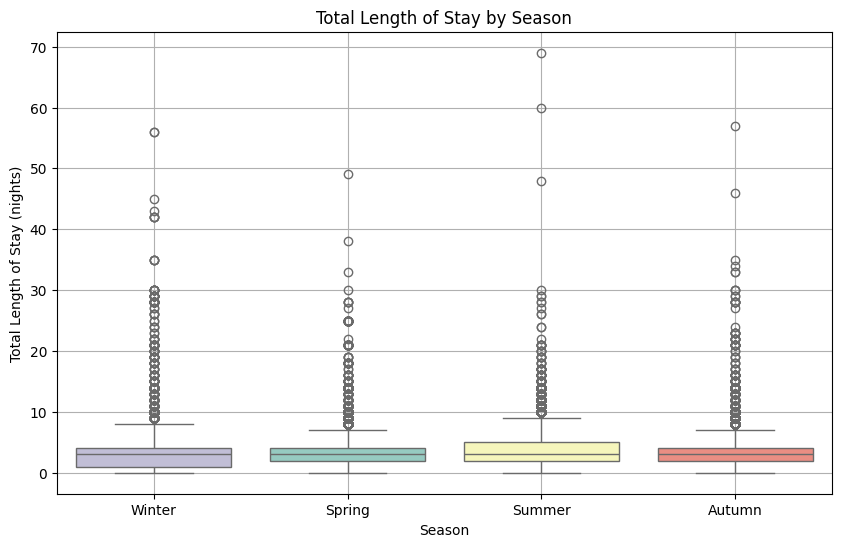

In [15]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

plt.figure(figsize=(10, 6))

sns.boxplot(x='season', y='total_stay', data=hotels, palette=season_colors, order=season_order)

plt.title("Total Length of Stay by Season")
plt.xlabel("Season")
plt.ylabel("Total Length of Stay (nights)")
plt.grid(True)
plt.show()


# 3) Reservation with largest number of guests that was not canceled

### Using pandas (slower):

In [16]:
hotels = pd.read_parquet('hotels.parquet')

hotels['total_guests'] = hotels['adults'] + hotels['children'].fillna(0) + hotels['babies']

non_canceled_reservations = hotels[hotels['is_canceled'] == 0]

city_hotel_max = non_canceled_reservations[non_canceled_reservations['hotel'] == 'City Hotel']
largest_city_hotel_reservation = city_hotel_max.loc[city_hotel_max['total_guests'].idxmax()]

resort_hotel_max = non_canceled_reservations[non_canceled_reservations['hotel'] == 'Resort Hotel']
largest_resort_hotel_reservation = resort_hotel_max.loc[resort_hotel_max['total_guests'].idxmax()]

largest_reservations_df = pd.DataFrame([largest_city_hotel_reservation, largest_resort_hotel_reservation])

largest_reservations_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,total_guests
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,0,0,0,D,D,12.0
201,Resort Hotel,0,8,2015,July,28,7,0,4,3,2.0,0,0,0,0,H,H,5.0


In [17]:
non_canceled = hotels[hotels['is_canceled'] == 0]

city_hotel_max_guests = non_canceled[non_canceled['hotel'] == 'City Hotel'].nlargest(1, 'total_guests')
resort_hotel_max_guests = non_canceled[non_canceled['hotel'] == 'Resort Hotel'].nlargest(1, 'total_guests')

print("City Hotel - Reservation with the biggest number of guests (non-canceled):")
print(city_hotel_max_guests[['total_guests', 'hotel']])

print("\nResort Hotel - Reservation with the biggest number of guests (non-canceled):")
print(resort_hotel_max_guests[['total_guests', 'hotel']])


City Hotel - Reservation with the biggest number of guests (non-canceled):
       total_guests       hotel
46619          12.0  City Hotel

Resort Hotel - Reservation with the biggest number of guests (non-canceled):
     total_guests         hotel
201           5.0  Resort Hotel


### Using polars (faster):

In [18]:
import polars as pl

hotels = pl.read_parquet("hotels.parquet")

hotels = hotels.with_columns(
    (pl.col("adults") + pl.col("children").fill_null(0) + pl.col("babies")).alias("total_guests")
)

non_canceled = hotels.filter(pl.col("is_canceled") == 0)

largest_reservations = (
    non_canceled.sort(["hotel", "total_guests"], descending=[False, True]).group_by("hotel").head(1)
)

largest_reservations


hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,total_guests
str,i64,i64,i64,str,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,str,str,f64
"""City Hotel""",0,37,2016,"""January""",3,12,0,2,2,0.0,10,0,0,0,"""D""","""D""",12.0
"""Resort Hotel""",0,22,2016,"""June""",26,21,0,2,3,1.0,1,0,0,0,"""H""","""H""",5.0


## Box Plot of Guest Number for Canceled and Non-Canceled Reservations

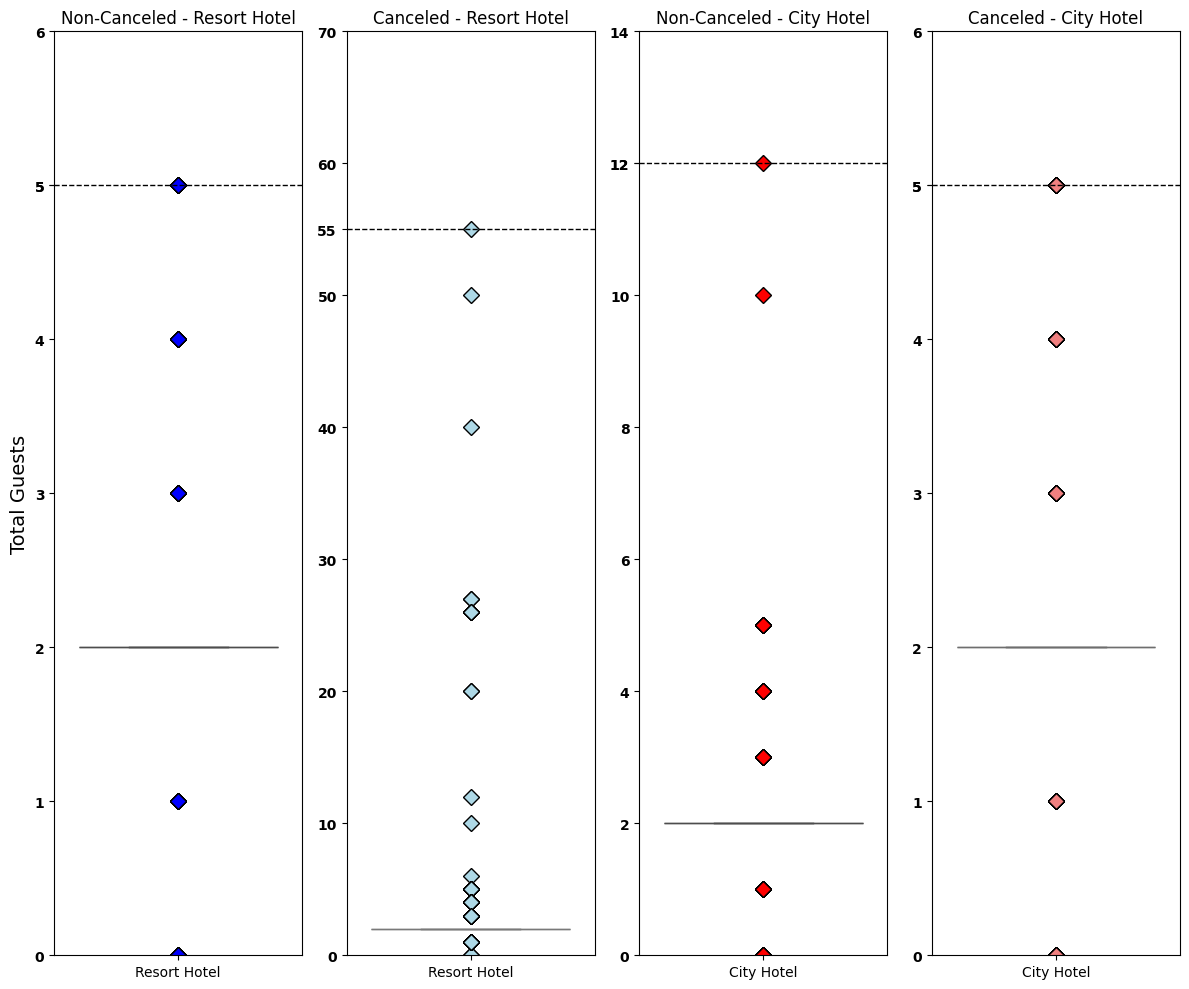

In [19]:
hotels = pd.read_parquet('hotels.parquet')

hotels['total_guests'] = hotels['adults'] + hotels['children'].fillna(0) + hotels['babies']

fig, axes = plt.subplots(1, 4, figsize=(12, 10), sharey=False)

resort_non_canceled = hotels[(hotels['is_canceled'] == 0) & (hotels['hotel'] == 'Resort Hotel')]
sns.boxplot(data=resort_non_canceled, x="hotel", y="total_guests", ax=axes[0], color='blue',
            flierprops={'marker': 'D', 'markerfacecolor': 'blue', 'markeredgecolor': 'black', 'markersize': 8})
axes[0].set_title("Non-Canceled - Resort Hotel")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Guests", fontsize=14)
axes[0].set_ylim(0, resort_non_canceled['total_guests'].max() * 1.1)

max_value_resort_non_canceled = resort_non_canceled['total_guests'].max()
axes[0].axhline(max_value_resort_non_canceled, color='black', linestyle='--', linewidth=1)

axes[0].set_yticks(axes[0].get_yticks().tolist() + [max_value_resort_non_canceled])
axes[0].set_yticklabels([f'{tick:.0f}' if tick != max_value_resort_non_canceled else f'{tick:.0f}' for tick in axes[0].get_yticks()], fontweight='bold')

resort_canceled = hotels[(hotels['is_canceled'] == 1) & (hotels['hotel'] == 'Resort Hotel')]
sns.boxplot(data=resort_canceled, x="hotel", y="total_guests", ax=axes[1], color='lightblue',
            flierprops={'marker': 'D', 'markerfacecolor': 'lightblue', 'markeredgecolor': 'black', 'markersize': 8})
axes[1].set_title("Canceled - Resort Hotel")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_ylim(0, resort_canceled['total_guests'].max() * 1.1)

max_value_resort_canceled = resort_canceled['total_guests'].max()
axes[1].axhline(max_value_resort_canceled, color='black', linestyle='--', linewidth=1)

axes[1].set_yticks(axes[1].get_yticks().tolist() + [max_value_resort_canceled])
axes[1].set_yticklabels([f'{tick:.0f}' if tick != max_value_resort_canceled else f'{tick:.0f}' for tick in axes[1].get_yticks()], fontweight='bold')

city_non_canceled = hotels[(hotels['is_canceled'] == 0) & (hotels['hotel'] == 'City Hotel')]
sns.boxplot(data=city_non_canceled, x="hotel", y="total_guests", ax=axes[2], color='red',
            flierprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'black', 'markersize': 8})
axes[2].set_title("Non-Canceled - City Hotel")
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_ylim(0, city_non_canceled['total_guests'].max() * 1.1)

max_value_city_non_canceled = city_non_canceled['total_guests'].max()
axes[2].axhline(max_value_city_non_canceled, color='black', linestyle='--', linewidth=1)

axes[2].set_yticks(axes[2].get_yticks().tolist() + [max_value_city_non_canceled])
axes[2].set_yticklabels([f'{tick:.0f}' if tick != max_value_city_non_canceled else f'{tick:.0f}' for tick in axes[2].get_yticks()], fontweight='bold')

city_canceled = hotels[(hotels['is_canceled'] == 1) & (hotels['hotel'] == 'City Hotel')]
sns.boxplot(data=city_canceled, x="hotel", y="total_guests", ax=axes[3], color='lightcoral',
            flierprops={'marker': 'D', 'markerfacecolor': 'lightcoral', 'markeredgecolor': 'black', 'markersize': 8})
axes[3].set_title("Canceled - City Hotel")
axes[3].set_xlabel("")
axes[3].set_ylabel("")
axes[3].set_ylim(0, city_canceled['total_guests'].max() * 1.1)

max_value_city_canceled = city_canceled['total_guests'].max()
axes[3].axhline(max_value_city_canceled, color='black', linestyle='--', linewidth=1)

axes[3].set_yticks(axes[3].get_yticks().tolist() + [max_value_city_canceled])
axes[3].set_yticklabels([f'{tick:.0f}' if tick != max_value_city_canceled else f'{tick:.0f}' for tick in axes[3].get_yticks()], fontweight='bold')

plt.tight_layout()
plt.show()


# 4) Cancellation rate of the bookings as a function of lead time

### Total Cancellations

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\2427154467.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_counts = df.groupby(['lead_time_bins', 'is_canceled']).size().unstack(fill_value=0)


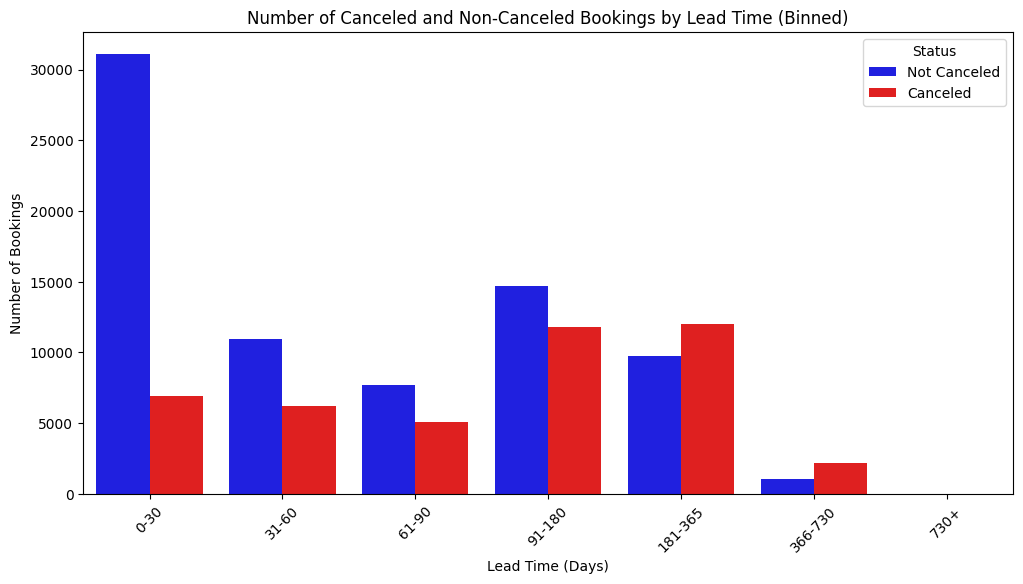

In [20]:
df = hotels

bins = [0, 30, 60, 90, 180, 365, 730, df['lead_time'].max()]
labels = ['0-30', '31-60', '61-90', '91-180', '181-365', '366-730', '730+']

df['lead_time_bins'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

lead_time_counts = df.groupby(['lead_time_bins', 'is_canceled']).size().unstack(fill_value=0)

lead_time_counts.columns = ['Not Canceled', 'Canceled']

lead_time_counts = lead_time_counts.reset_index()

lead_time_counts_melted = lead_time_counts.melt(id_vars='lead_time_bins', var_name='Cancellation Status', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=lead_time_counts_melted, x='lead_time_bins', y='Count', hue='Cancellation Status', palette=['blue', 'red'])

plt.title("Number of Canceled and Non-Canceled Bookings by Lead Time (Binned)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.legend(title="Status")
plt.xticks(rotation=45)
plt.show()


### Cancellation Ratio

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\4044788679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lead_time_bins'] = pd.cut(df['lead_time'], bins=bins, right=False)
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\4044788679.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('lead_time_bins')['is_canceled'].count()
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\4044788679.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

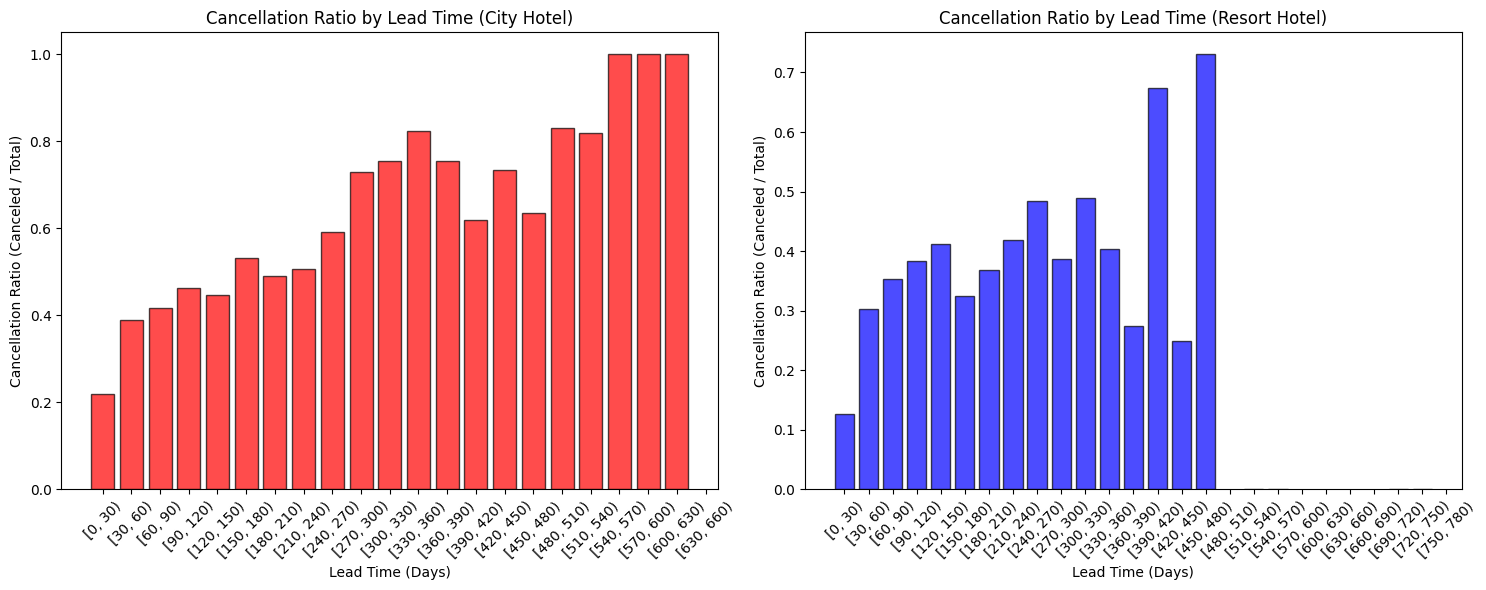

In [21]:
df_city = hotels[hotels['hotel'] == 'City Hotel']
df_resort = hotels[hotels['hotel'] == 'Resort Hotel']

bins = np.arange(0, 800, 30)

def calculate_cancellation_ratio(df):
    df['lead_time_bins'] = pd.cut(df['lead_time'], bins=bins, right=False)

    total_counts = df.groupby('lead_time_bins')['is_canceled'].count()
    cancel_counts = df.groupby('lead_time_bins')['is_canceled'].sum()

    cancellation_ratio = cancel_counts / total_counts

    return cancellation_ratio, total_counts, cancel_counts

cancellation_ratio_city, total_counts_city, cancel_counts_city = calculate_cancellation_ratio(df_city)
cancellation_ratio_resort, total_counts_resort, cancel_counts_resort = calculate_cancellation_ratio(df_resort)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(cancellation_ratio_city.index.astype(str), cancellation_ratio_city.values, 
            color='red', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Lead Time (Days)')
axes[0].set_ylabel('Cancellation Ratio (Canceled / Total)')
axes[0].set_title('Cancellation Ratio by Lead Time (City Hotel)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(cancellation_ratio_resort.index.astype(str), cancellation_ratio_resort.values, 
            color='blue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Lead Time (Days)')
axes[1].set_ylabel('Cancellation Ratio (Canceled / Total)')
axes[1].set_title('Cancellation Ratio by Lead Time (Resort Hotel)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Cancellation Ratio as Scatterplot

C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\51234267.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_counts_city = df_city.groupby('lead_time_bins')['is_canceled'].sum()
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\51234267.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_city = df_city.groupby('lead_time_bins')['is_canceled'].count()
C:\Users\sonya\AppData\Local\Temp\ipykernel_10472\51234267.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

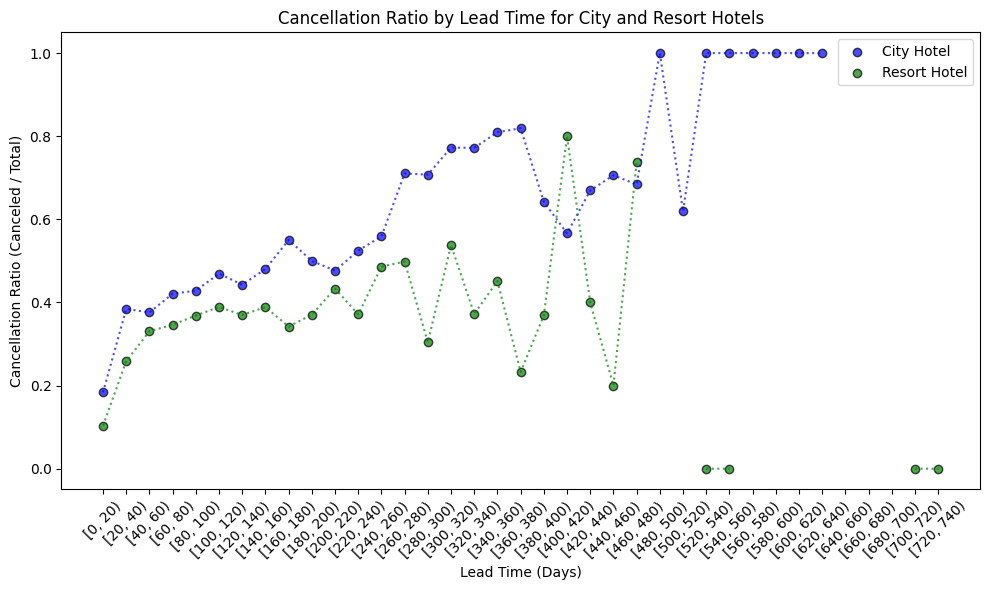

In [22]:
min_lead_time = hotels['lead_time'].min()
max_lead_time = hotels['lead_time'].max()

bin_width = 20
bins = np.arange(min_lead_time, max_lead_time + bin_width, bin_width)

hotels['lead_time_bins'] = pd.cut(hotels['lead_time'], bins=bins, right=False)

df_city = hotels[hotels['hotel'] == 'City Hotel']
df_resort = hotels[hotels['hotel'] == 'Resort Hotel']

cancel_counts_city = df_city.groupby('lead_time_bins')['is_canceled'].sum()
total_counts_city = df_city.groupby('lead_time_bins')['is_canceled'].count()
cancellation_ratio_city = cancel_counts_city / total_counts_city

cancel_counts_resort = df_resort.groupby('lead_time_bins')['is_canceled'].sum()
total_counts_resort = df_resort.groupby('lead_time_bins')['is_canceled'].count()
cancellation_ratio_resort = cancel_counts_resort / total_counts_resort

plt.figure(figsize=(10, 6))

plt.scatter(cancellation_ratio_city.index.astype(str), cancellation_ratio_city.values, 
            color='blue', alpha=0.7, edgecolor='black', label='City Hotel')
plt.plot(cancellation_ratio_city.index.astype(str), cancellation_ratio_city.values, 
         color='blue', linestyle=':', alpha=0.7)

plt.scatter(cancellation_ratio_resort.index.astype(str), cancellation_ratio_resort.values, 
            color='green', alpha=0.7, edgecolor='black', label='Resort Hotel')
plt.plot(cancellation_ratio_resort.index.astype(str), cancellation_ratio_resort.values, 
         color='green', linestyle=':', alpha=0.7)

plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Ratio (Canceled / Total)')
plt.title('Cancellation Ratio by Lead Time for City and Resort Hotels')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()



### Overlap of Canceled to Non-Canceled Bookings

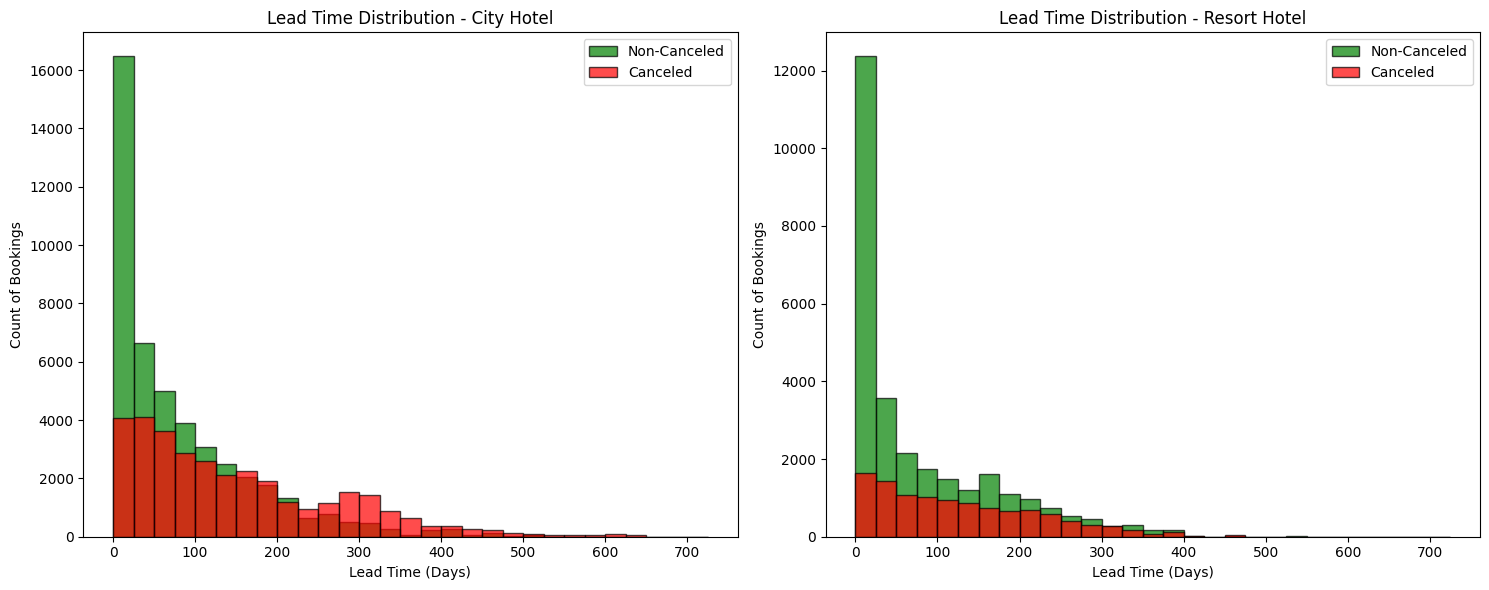

In [23]:
df_city = hotels[hotels['hotel'] == 'City Hotel']
df_resort = hotels[hotels['hotel'] == 'Resort Hotel']

bins = np.arange(0, 750, 25)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(df_city[df_city['is_canceled'] == 0]['lead_time'], bins=bins, color='green', alpha=0.7, label='Non-Canceled', edgecolor='black')
axes[0].hist(df_city[df_city['is_canceled'] == 1]['lead_time'], bins=bins, color='red', alpha=0.7, label='Canceled', edgecolor='black')
axes[0].set_xlabel('Lead Time (Days)')
axes[0].set_ylabel('Count of Bookings')
axes[0].set_title('Lead Time Distribution - City Hotel')
axes[0].legend()

axes[1].hist(df_resort[df_resort['is_canceled'] == 0]['lead_time'], bins=bins, color='green', alpha=0.7, label='Non-Canceled', edgecolor='black')
axes[1].hist(df_resort[df_resort['is_canceled'] == 1]['lead_time'], bins=bins, color='red', alpha=0.7, label='Canceled', edgecolor='black')
axes[1].set_xlabel('Lead Time (Days)')
axes[1].set_ylabel('Count of Bookings')
axes[1].set_title('Lead Time Distribution - Resort Hotel')
axes[1].legend()

plt.tight_layout()
plt.show()
